In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Analysis of the relation of climate change and natural-disaster data

In [15]:
PATH_TEMP_DATA_FOLDER = "data/processed/temperature/"
PATH_TEMP_LAND_COUNTRY_FILE = "temp-land-country.csv"
PATH_TEMP_LAND_OCEAN_GLOBAL_FILE = "temp-land-ocean-global.csv"
PATH_TEMP_LAND_REGION_FILE = "temp-land-region.csv"

PATH_DIS_DATA_FOLDER = "data/processed/disaster/"
PATH_DIS_COUNTRY_FILE = "disaster-country.csv"
PATH_DIS_GLOBAL_FILE = "disaster-global.csv"
PATH_DIS_REGION_FILE = "disaster-region.csv"

### 1. Analysis on global level

In [16]:
temp_global = pd.read_csv(PATH_TEMP_DATA_FOLDER + PATH_TEMP_LAND_OCEAN_GLOBAL_FILE)
dis_global = pd.read_csv(PATH_DIS_DATA_FOLDER + PATH_DIS_GLOBAL_FILE)

### Analysis of global level temp data

In [17]:
temp_global.head()

,year,month,temperature_anomaly
0,1900,1,-0.410
1,1900,2,-0.006
2,1900,3,0.046
3,1900,4,-0.116
4,1900,5,-0.073


Check for missing temperature_anomalies

In [18]:
temp_global[temp_global['temperature_anomaly'].isna()].size

0

In [19]:
temp_global_yearly = pd.DataFrame
temp_global_yearly = temp_global.groupby('year')['temperature_anomaly'].mean()
temp_global_yearly = temp_global_yearly.reset_index()
temp_global_yearly.head()

,year,temperature_anomaly
0,1900,-0.125167
1,1901,-0.199333
2,1902,-0.362167
3,1903,-0.461750
4,1904,-0.519250


C:\Users\Sebi\AppData\Local\Temp\ipykernel_40208\3606263671.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  temp_global_yearly_chart.set_xticklabels(temp_global_yearly_chart.get_xticklabels(), rotation=65, horizontalalignment='right')


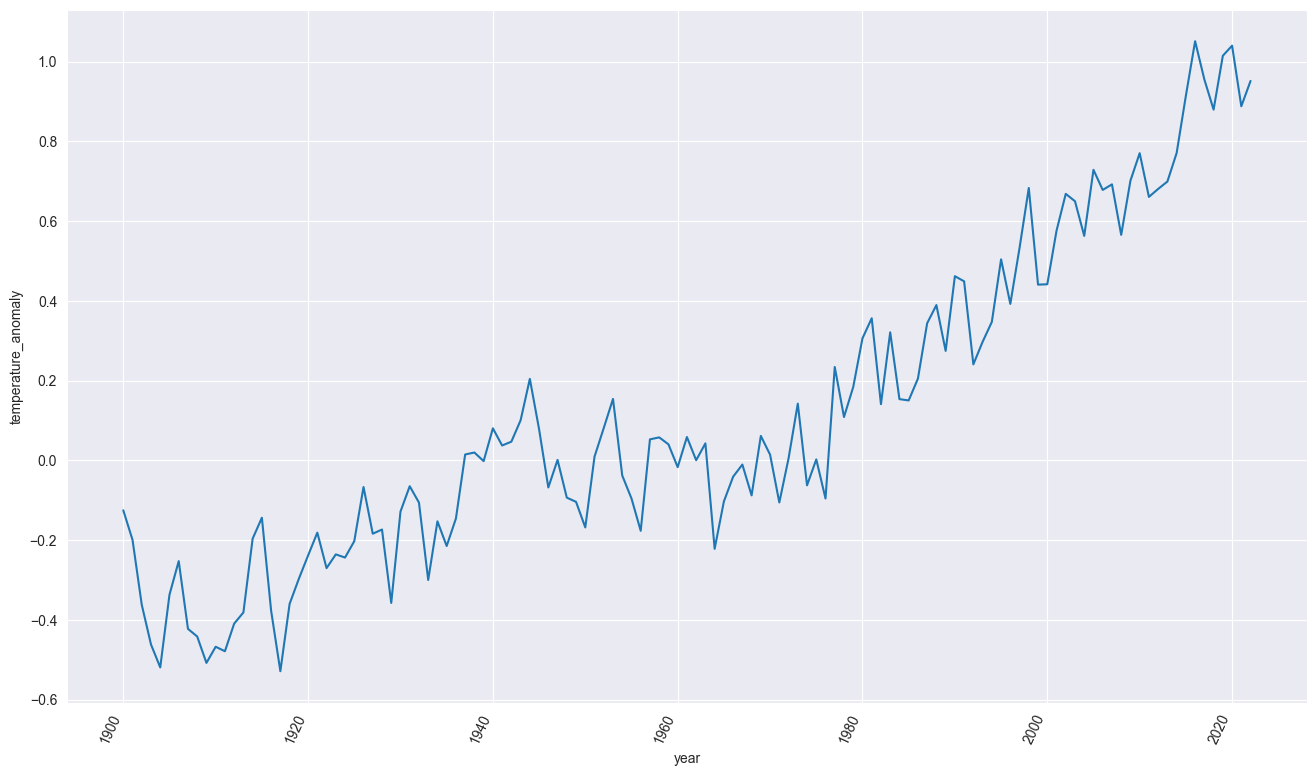

In [20]:
plt.figure(figsize=(16,9))
temp_global_yearly_chart = sns.lineplot(x="year", y="temperature_anomaly", data=temp_global_yearly)
temp_global_yearly_chart.set_xticklabels(temp_global_yearly_chart.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.show()
None

Find outliers

<AxesSubplot: >

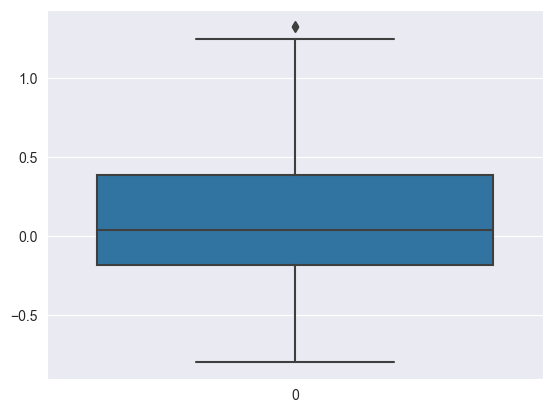

In [21]:
sns.boxplot(temp_global['temperature_anomaly'])

Fit a linear model to the data

In [46]:
print(temp_global_yearly.dtypes)


X_train = temp_global_yearly['year'].to_numpy().reshape(-1,1)
y_train = temp_global_yearly['temperature_anomaly'].to_numpy().reshape(-1,1)

reg = LinearRegression().fit(X=X_train, y=y_train)

reg.coef_

year                     int64
temperature_anomaly    float64
dtype: object


array([[0.01026069]])

### 2. Analysis of regional level temp data

In [23]:
temp_region = pd.read_csv(PATH_TEMP_DATA_FOLDER + PATH_TEMP_LAND_REGION_FILE)

In [24]:
temp_region_yearly = pd.DataFrame
temp_region_yearly = temp_region.groupby(['region_name', 'region_code','year'])['temperature_anomaly'].mean()
temp_region_yearly = temp_region_yearly.reset_index()
temp_region_yearly.head()

,region_name,region_code,year,temperature_anomaly
0,Africa,2.0,1900,-0.016705
1,Africa,2.0,1901,-0.049141
2,Africa,2.0,1902,-0.110464
3,Africa,2.0,1903,-0.415757
4,Africa,2.0,1904,-0.723711


Find outliers

<AxesSubplot: >

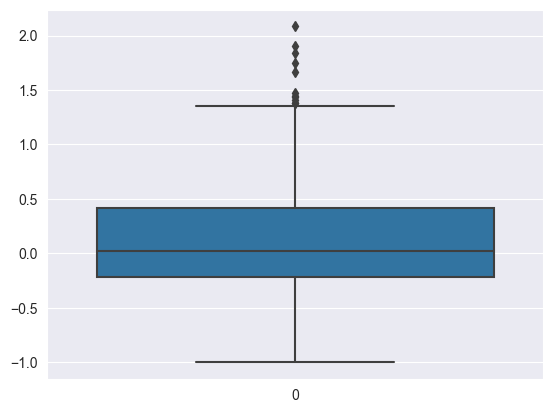

In [25]:
sns.boxplot(temp_region_yearly['temperature_anomaly'])

In [26]:
temp_region_yearly[abs(temp_region_yearly['temperature_anomaly']) > 1.5]

,region_name,region_code,year,temperature_anomaly
477,Europe,150.0,2014,1.751462
478,Europe,150.0,2015,1.669907
481,Europe,150.0,2018,1.841839
482,Europe,150.0,2019,1.900768
483,Europe,150.0,2020,2.083715


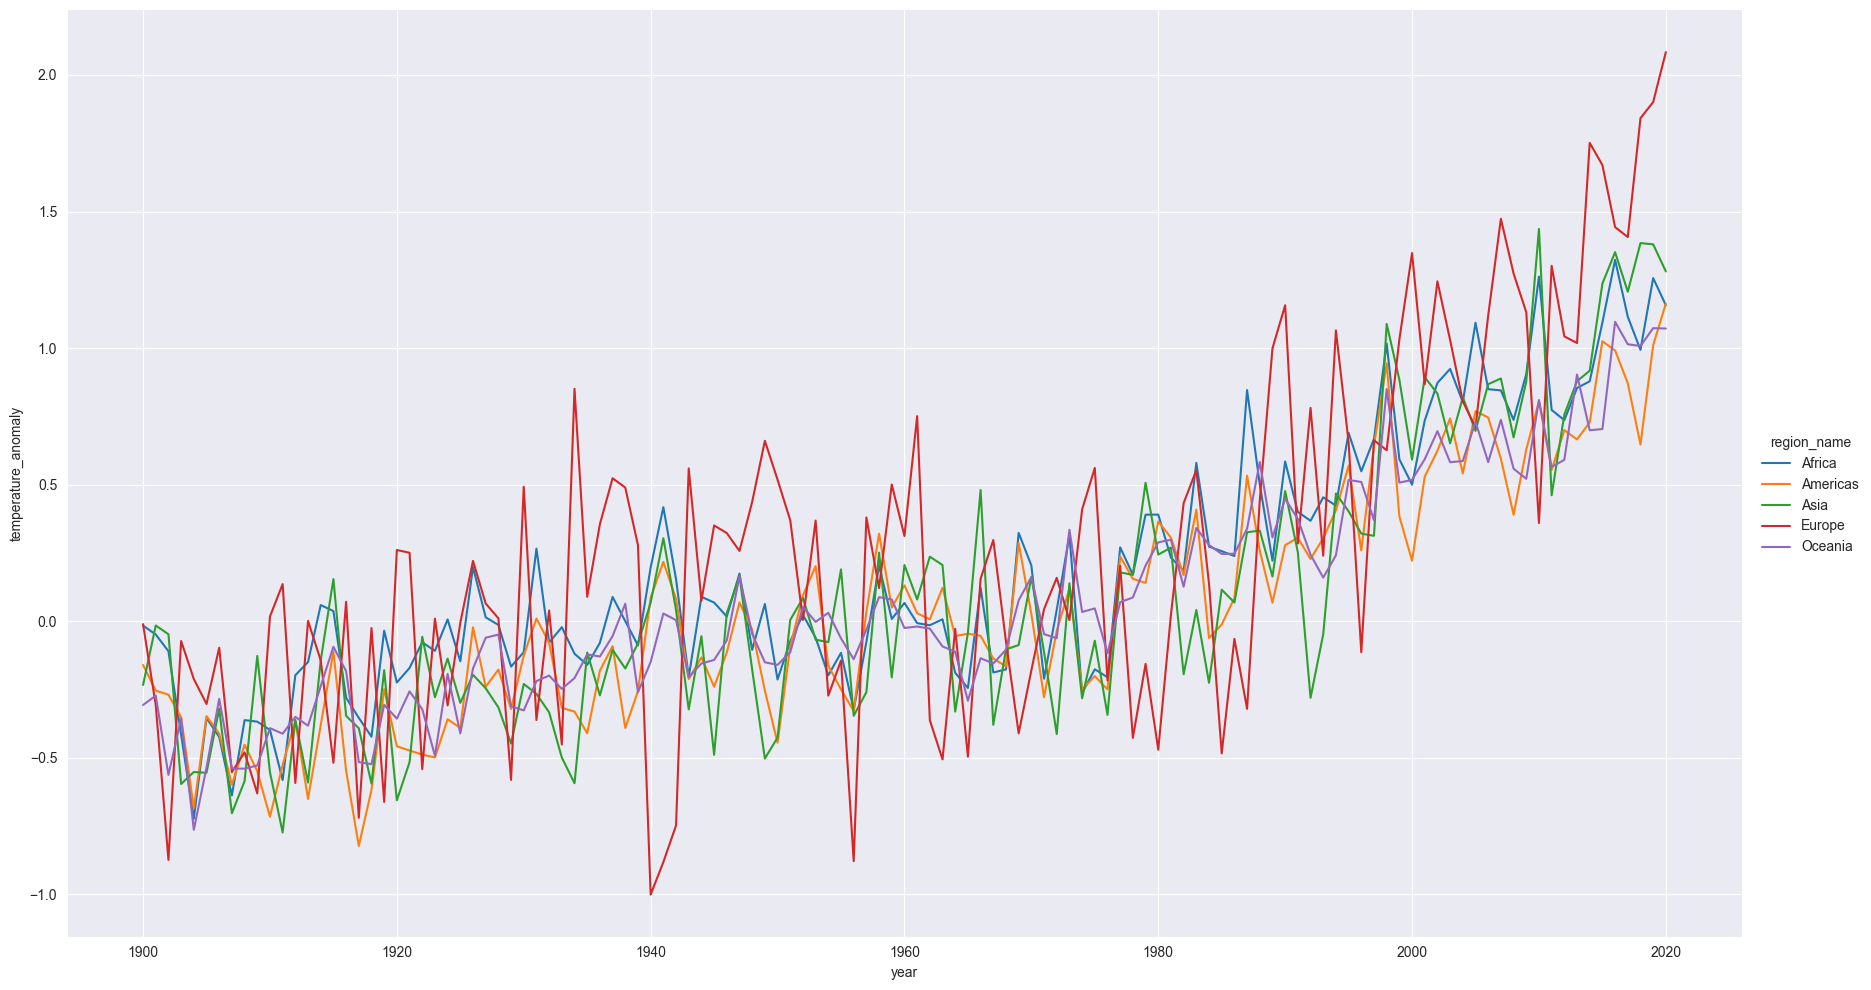

In [27]:
temp_region_yearly_chart = sns.relplot(data=temp_region_yearly, x="year", y="temperature_anomaly", hue="region_name", kind="line", height=10, aspect=1.77)

### 3. Analysis on country level

In [28]:
temp_country = pd.read_csv(PATH_TEMP_DATA_FOLDER + PATH_TEMP_LAND_COUNTRY_FILE)

In [29]:
temp_country_yearly = pd.DataFrame
temp_country_yearly = temp_country.groupby(['country_code','country_name','year'])['temperature_anomaly'].mean()
temp_country_yearly = temp_country_yearly.reset_index()
temp_country_yearly.head()

,country_code,country_name,year,temperature_anomaly
0,ABW,Aruba,1900,-0.061750
1,ABW,Aruba,1901,-0.284250
2,ABW,Aruba,1902,-0.379833
3,ABW,Aruba,1903,-0.241583
4,ABW,Aruba,1904,-0.711917


Find outliers

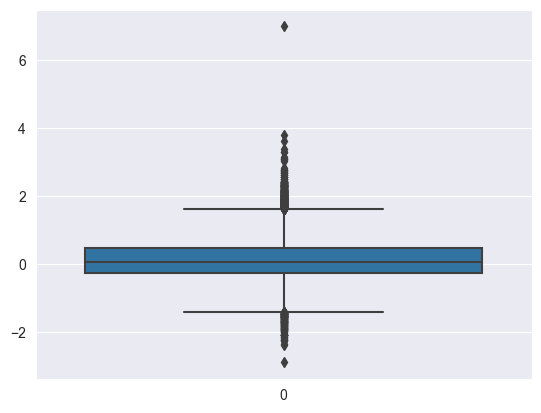

In [30]:
# Todo: change to use statistical method for finding outliers
sns.boxplot(temp_country_yearly['temperature_anomaly'])
temp_country_yearly_anomaly_outlier_value = 2

Find countries with interesting temperature anomalies

In [47]:
# 1. Approach, filter countries by finding outliers
selected_countries = temp_country_yearly[abs(temp_country_yearly['temperature_anomaly']) > temp_country_yearly_anomaly_outlier_value]['country_code'].unique()
print(selected_countries)

['ALA' 'ARM' 'AUT' 'AZE' 'BEL' 'BGR' 'BHR' 'BIH' 'BLR' 'CAN' 'CHE' 'CZE'
 'DEU' 'DNK' 'DZA' 'EGY' 'ESH' 'EST' 'FIN' 'FRA' 'GEO' 'GRL' 'HRV' 'HUN'
 'IRN' 'IRQ' 'ISR' 'JOR' 'KAZ' 'KWT' 'LBN' 'LBY' 'LIE' 'LTU' 'LUX' 'LVA'
 'MDA' 'MNE' 'MNG' 'MRT' 'NAM' 'NLD' 'NOR' 'POL' 'PSE' 'QAT' 'ROU' 'RUS'
 'SJM' 'SPM' 'SRB' 'SVK' 'SVN' 'SWE' 'SYR' 'TUR' 'UKR' 'USA' 'UZB']


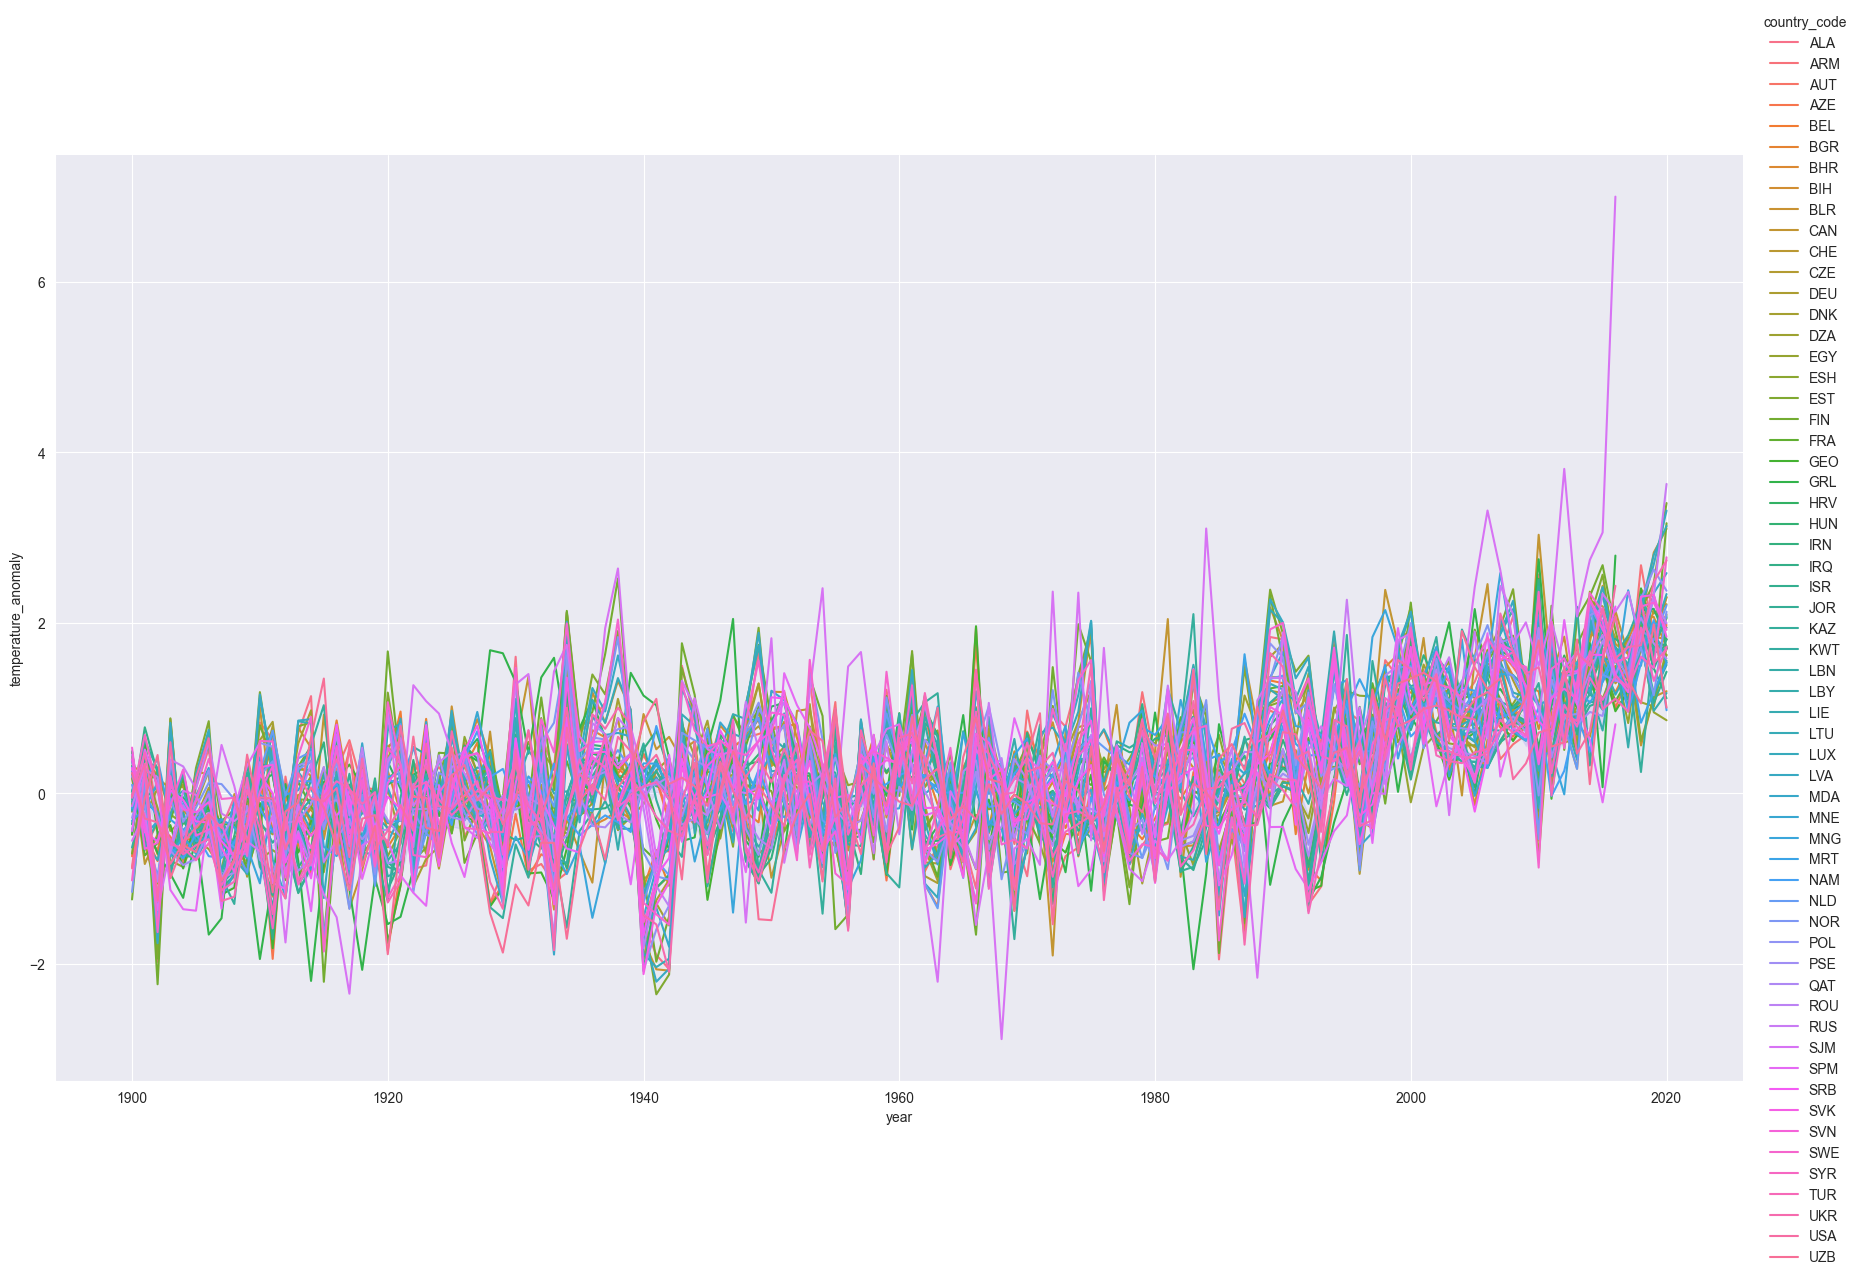

In [48]:
temp_countries_anomaly_abs_outlier = temp_country_yearly[temp_country_yearly['country_code'].isin(selected_countries)]
sns.relplot(data=temp_countries_anomaly_abs_outlier, x="year", y="temperature_anomaly", hue="country_code", kind="line", height=10, aspect=1.77)

['ALA' 'BLR' 'EST' 'FIN' 'GRL' 'LTU' 'LVA' 'POL' 'SJM' 'SWE' 'UKR']


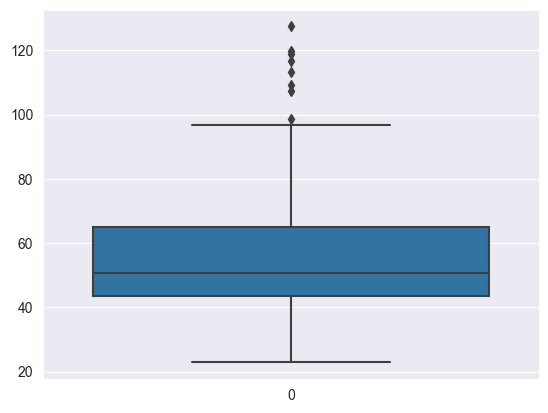

In [49]:
# 2. Approach, filter countries by sum of anomalies
temp_countries_anomaly_sum = temp_country_yearly.groupby(['country_code','country_name'])['temperature_anomaly'].apply(lambda t: t.abs().sum()).reset_index(name='anomaly_sum')
sns.boxplot(temp_countries_anomaly_sum['anomaly_sum'])

# Todo: use statistical method to find outlier
temp_countries_anomaly_sum_outlier_value = 95
selected_countries = temp_countries_anomaly_sum[temp_countries_anomaly_sum['anomaly_sum'] > temp_countries_anomaly_sum_outlier_value]['country_code'].unique()
print(selected_countries)

Plot country temp data

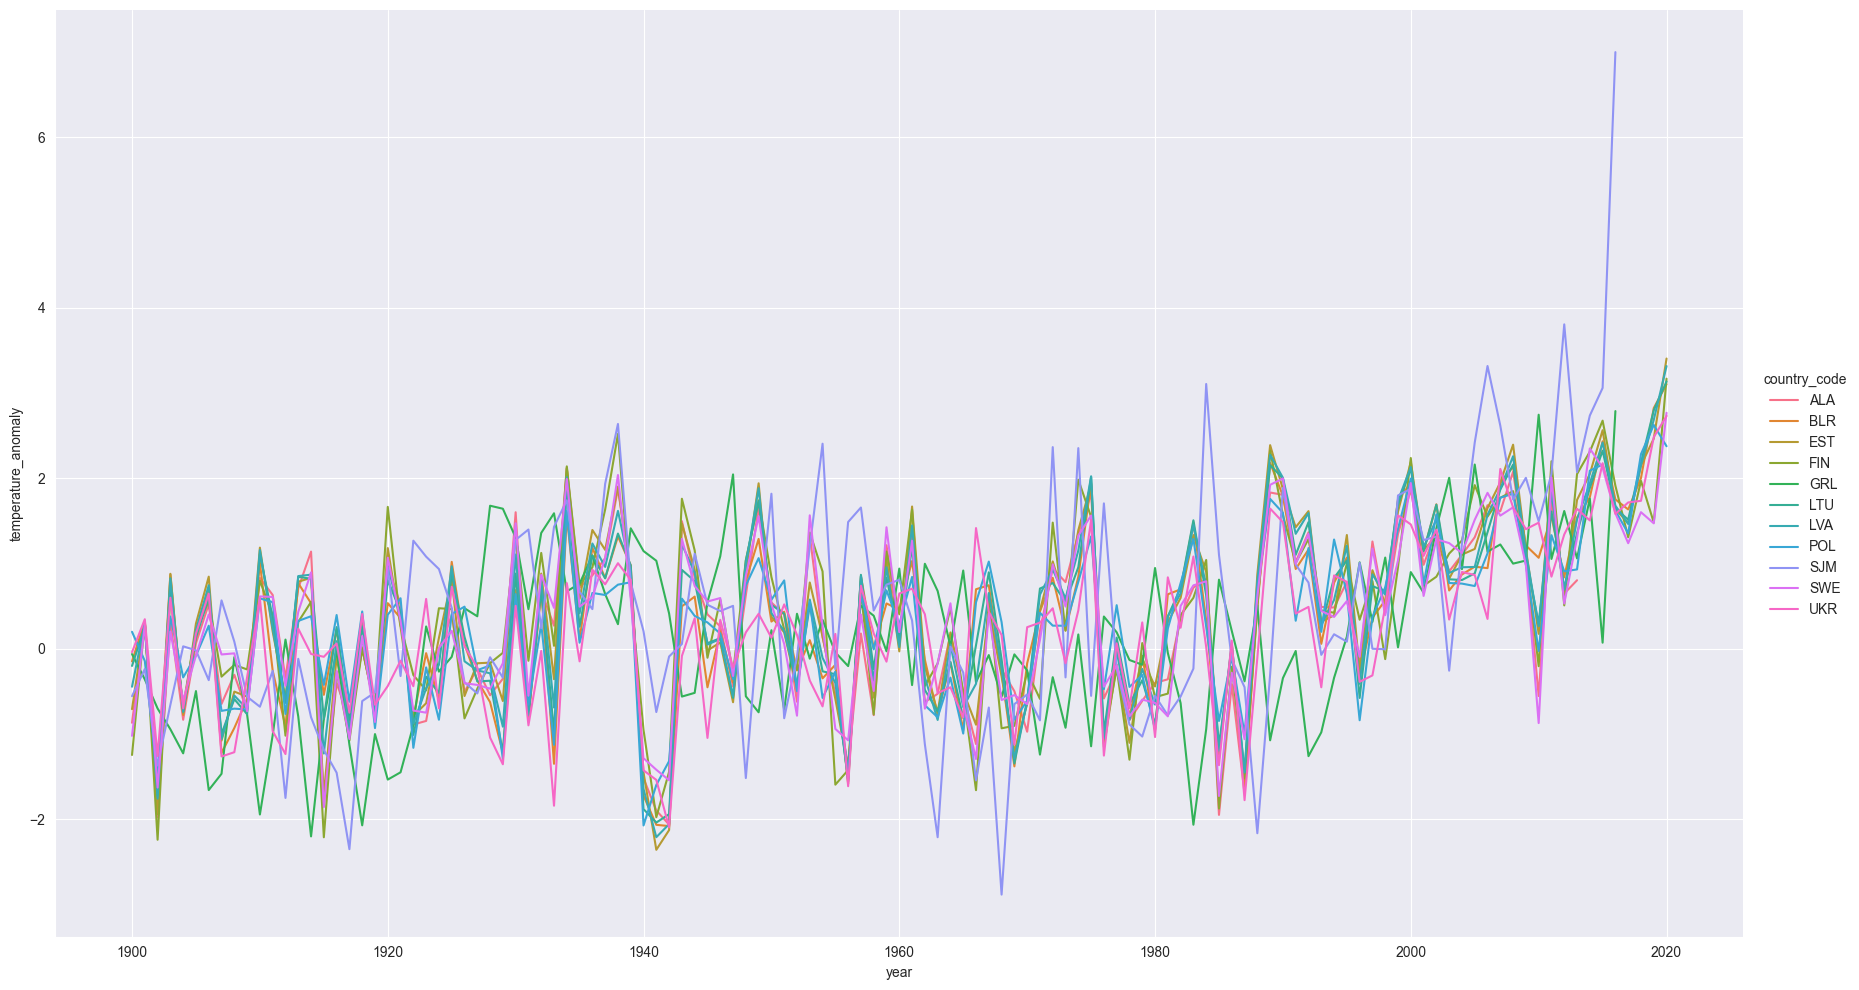

In [50]:
temp_countries_anomaly_sum_outlier = temp_country_yearly[temp_country_yearly['country_code'].isin(selected_countries)]
sns.relplot(data=temp_countries_anomaly_sum_outlier, x="year", y="temperature_anomaly", hue="country_code", kind="line", height=10, aspect=1.77)